# Introduction

For the final project of CE 4981, I will be using the Airbnb price prediction dataset. This dataset is avilable at https:www.kaggle.com/stevezhenghp/airbnb-price-prediction and can be downloaded as a plain csv file. This dataset provides an abundance of data attributes, with a large number of samples, which can help predict price, ratings, and much more. After cleaning up the data, the dataset will provide a good means of performing both supervised and unsupervised learning opportunities.

# Hypothesis

There are several hypothesis that can be drafted from the airbnb data. For this project, I am particularly interested in determining the sustance to three main hypothesis, with additional exploritory analysis to determine the validity of a few more smaller hypothesis.

The first, and likely the most common hypothesis that I wish to test, is that the price of a particular airbnb can be accurately predicted using a subset of the enitre dataset. Of all the possible attributes, I predict that location, beds, number of ammenities, and the number of people that the airbnb can accomodate will have the largest impact on the pricing of an airbnb. Further, I hypothesize that including other attributes may actually weaken the ability of the attributes to accurately predict the price of an airbnb; rather, they are likley just contributing noise. This hypothesis can likely be explored using a form of supervised linear regression. If the data model is accurate, it could be a powerful tool for airbnb hosts in setting prices.

Secondly, it's likely that groups of characteristics/attributes exist in which the pricing is similar. For example, houses in certain neighborhoods, with a certain amount of rooms, with the same type of housing category may be able to be grouped together in terms of pricing. This, again, could be a powerful tool for hosts to set prices, or for consumers to identify outliers in the cluster that the type of airbnb they are looking for belong (helping avoid overpriced airbnbs, or finding great deals).

While these hypotheses are great for identifying high level macro-level relationships in the airbnb data, they are several other smaller relationships worth exploring. These details may reveal hidden details or secrets that make an unporportionately large difference in the price or quality of an airbnb. These smaller hypothesis can be summarized in the following list.

* <strong>Geographical Data</strong> - I hypothesize that the geographical location of an airbnb (given by zipcode) has the highest, or close to the highest correlation to the price of an airbnb. Airbnbs in places such as California likely are much more expensive than Wisconsin, and a large portion of this is probably due to their location.

* <strong>Price and Rating</strong> - I hypothesize that paying a higher price for an airbnb would correlate to a higher satisfaction rating (as given by the number of stars rated). I have a feeling that I may be suprised on this one though.

* <strong>Host Qualities</strong> - I hypothesize that the more involved a host is in their airbnb, which can be derived by the length of the description and other host attributes, the higher the ratings will be on their airbnb. Similarly, the better a host is, the higher they are likely able to charge for their airbnb.

* <strong>Amenities</strong> - I hypothesize that the number of amenities that an airbnb has likely has a strong, positive correlation with the price and ratings of the airbnb. My prediction is this my correlate to the price almost as strongly as the geographical location of the airbnb.

* <strong>More if time permits...<strong>

# Dataset

The dataset, which is shown in the next cell, consists of various attributes regarding airbnb. The target variable of this dataset its price, which is shown as a logarithm in the raw data. The dataset was downloaded from https://www.kaggle.com/stevezhenghp/airbnb-price-prediction, and the author, Steve Zheng provides several this dataset free of charge, but with very little explaination of the features. As a result, the meaning of the features are largely up to interpretation, but I have done my best in the list below to provide a brief explanation for each feature.
* id - This field simply provides an identification number for each instance. This is likely not useful for any data exploration.
* log_price - This is the log of the price for the particular airbnb.
* property_type - this categorical field indicates the type of property that the airbnb is (such as a house, apartment, cave, etc.)
* room_type - This field indicated whether the airbnb is the whole entire property, or just a subset.
* Amenities - This field describes what amenities are included with the airbnb (such as TV, air conditioning, etc.)
* accommodates - This field describes how many people can stay in the airbnb at a single time.
* bathrooms - This field indicates how many bathrooms are in the airbnb. This can be a faction due to bathrooms which only have a toilet and not a shower/bathtub.
* This field indicated whether the airbnb has a bed, or rather, has an alternative such as a futon.
* cancellation_policy - This is a categorical attribute which indicates whether an airbnb host's cancellation policy is strict, moderate or flexible. Flexible options are often more attractive to renters.
* cleaning_fee - This field indicates whether a cleaning fee is charged (True) or not (False)
* city - This field contains a string representing the city that the airbnb is located in. This is represented by an acronym in some cases, and in others, it is the entire name of the city.
* description - This is a field that described what the airbnb is like. This makes it easier for the buyer to get an idea how they will like the airbnb prior to purchase.
* first_review - This field indicates the date of the airbnb's first review
* host_has_profile_pic - This indicates whether or not a host has a profile picture for their account (t - yes, f - no)
* host_identity_verified - This indicates whether or not a host's identify has been verified or not (t - yes, f - no)
* host_response_rate - This field indicates how often a host responds to a potential buyers message.
* host_since - This field is a date which indicates the day that the host became registered to host an airbnb.
* instant_bookable - This indicates whether a airbnb can be booked without any waiting (t) or not (f).
* last_review - This field indicates the most recent date that an airbnb was reviewed.
* latitude - The latitude, in degrees, that the airbnb is located at.
* longitude - The longitude, in degrees, that the airbnb is located at.
* name - This is a string that represents the name of the airbnb. This is often the first impression of an airbnb for a customer.
* neighbourhood - This is a string representation of the name of the neighbourhood that the airbnb is located at.
* number_of_reviews - The total number of customers that have reviewed the airbnb. This field can be represented by an integer.
* review_scores_rating - This field indicates the average of all the reviews for the airbnb. If there are no ratings for the airbnb, it is blank.
* thumbnail_url - This field contains a hyperlink to an image of the airbnb being rented. This field is left blank if no thumbnail image exists.
* zipcode - This field represents the zipcode that the airbnb is located at. The zipcodes are often represented in different formats for this dataset.
* bedrooms - This is an integer value indicating how many bedrooms the airbnb has.
* beds - This is an integer value indicating how many beds are available in the airbnb.

In [204]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv('./data/train.csv')
raw_data.head(n=10)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.011,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.000,Real Bed,strict,True,...,40.697,-73.992,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.000,1.000
1,6304928,5.130,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.000,Real Bed,strict,True,...,40.766,-73.989,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.000,3.000
2,7919400,4.977,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.000,Real Bed,moderate,True,...,40.808,-73.944,The Garden Oasis,Harlem,10,92.000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.000,3.000
3,13418779,6.620,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.000,Real Bed,flexible,True,...,37.772,-122.432,Beautiful Flat in the Heart of SF!,Lower Haight,0,nan,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.000,2.000
4,3808709,4.745,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.000,Real Bed,moderate,True,...,38.926,-77.035,Great studio in midtown DC,Columbia Heights,4,40.000,NaN,20009,0.000,1.000
5,12422935,4.443,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.000,Real Bed,strict,True,...,37.753,-122.430,Comfort Suite San Francisco,Noe Valley,3,100.000,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.000,1.000
6,11825529,4.419,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.000,Real Bed,moderate,True,...,33.980,-118.463,Beach Town Studio and Parking!!!11h,NaN,15,97.000,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.000,1.000
7,13971273,4.787,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.000,Real Bed,moderate,True,...,34.047,-118.260,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.000,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.000,1.000
8,180792,4.787,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.000,Real Bed,moderate,True,...,37.781,-122.501,Cozy Garden Studio - Private Entry,Richmond District,159,99.000,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.000,1.000
9,5385260,3.584,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.000,Real Bed,moderate,True,...,33.993,-117.896,No.7 Queen Size Cozy Room 舒适大床房,NaN,2,90.000,https://a0.muscache.com/im/pictures/8d2f08ce-b...,91748,1.000,1.000


In [325]:
raw_data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,"74,111.000","74,111.000","74,111.000","73,911.000","74,111.000","74,111.000","74,111.000","57,389.000","74,020.000","73,980.000"
mean,"11,266,617.102",4.782,3.155,1.235,38.446,-92.398,20.901,94.067,1.266,1.711
std,"6,081,734.887",0.717,2.154,0.582,3.080,21.705,37.829,7.837,0.852,1.254
min,344.000,0.000,1.000,0.000,33.339,-122.511,0.000,20.000,0.000,0.000
25%,"6,261,964.500",4.317,2.000,1.000,34.128,-118.342,1.000,92.000,1.000,1.000
50%,"12,254,147.000",4.710,2.000,1.000,40.662,-76.997,6.000,96.000,1.000,1.000
75%,"16,402,260.500",5.220,4.000,1.000,40.746,-73.955,23.000,100.000,1.000,2.000
max,"21,230,903.000",7.600,16.000,8.000,42.390,-70.985,605.000,100.000,10.000,18.000


# Data Preprocessing

## Attribute Reduction

There are a few data attributes that will not be needed in the analysis of the data, so a new table will be constructed with copies of the attributes that will be helpful for data analysis.

In [206]:
modified_data = raw_data.copy()
modified_data.drop(['id', 'neighbourhood', 'name', 'first_review', 'last_review'], axis=1, inplace=True)
modified_data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_since,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5.011,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.000,Real Bed,strict,True,NYC,...,3/26/2012,f,40.697,-73.992,2,100.000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.000,1.000
1,5.130,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.000,Real Bed,strict,True,NYC,...,6/19/2017,t,40.766,-73.989,6,93.000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.000,3.000
2,4.977,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.000,Real Bed,moderate,True,NYC,...,10/25/2016,t,40.808,-73.944,10,92.000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.000,3.000
3,6.620,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.000,Real Bed,flexible,True,SF,...,4/19/2015,f,37.772,-122.432,0,nan,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.000,2.000
4,4.745,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.000,Real Bed,moderate,True,DC,...,3/1/2015,t,38.926,-77.035,4,40.000,NaN,20009,0.000,1.000


<p>In total, 3 columns were dropped because they either could be represented through other attributes, or they don't add much clarity or value to the dataset. In summary, the following attributes were removed, with their respective reason:</p>

* <strong>id</strong> - ID does not provide any analytical value to the dataset and is merely a means for tracking instances, likely for an application. There is no need to keep track of particular instances for this dataset.
* <strong>latitude</strong> - This attribute can be adequetly represented by the zipcode attribute.
* <strong>longitude</strong> - This attribute can be adequetly represented by the zipcode attribute.

    *Note: If a zipcode is not present, it can be calculated using online tools by using longitude and latitude as a parameter.*

* <strong>neighbourhood</strong> - The reasoning for this is similar to the reasoning for latitude and longitude; zipcode can adequetly represent the geographical location of the airbnb.


## Datatypes

A quick look at the datatype of each attribute should be performed to help identify any columns that are typed incorrectly. An incorrect type often is a hint that there are data values that need to be cleaned up.

In [207]:
modified_data.dtypes

log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
latitude                  float64
longitude                 float64
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

## Handle Missing Values

### log_price

In [208]:
print(np.dtype(modified_data.property_type))
print('Null Values: ', modified_data.log_price.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.log_price.unique()))

object
Null Values:  False
Number of Unique Values:  767


### property_type

Property type was an Object, but it should be converted into a category data type.

In [209]:
modified_data.property_type = modified_data.property_type.astype('category')

In [210]:
print('Data Type: ', modified_data.property_type.dtype)
print('Null Values: ', modified_data.property_type.isnull().values.any())
print('Number of N/A values', modified_data[modified_data.property_type == "N/A"]["property_type"].count())
print('Number of Unique Values: ', np.size(modified_data.property_type.unique()))
modified_data.property_type.unique()

Data Type:  category
Null Values:  False
Number of N/A values 0
Number of Unique Values:  35


[Apartment, House, Condominium, Loft, Townhouse, ..., Parking Space, Train, Cave, Lighthouse, Island]
Length: 35
Categories (35, object): [Apartment, House, Condominium, Loft, ..., Train, Cave, Lighthouse, Island]

### room_type

In [211]:
modified_data.room_type = modified_data.room_type.astype('category')

In [212]:
print('Data Type: ', modified_data.room_type.dtype)
print('Null Values: ', modified_data.room_type.isnull().values.any())
print('Number of N/A values', modified_data[modified_data.room_type == "N/A"]["property_type"].count())
print('Number of Unique Values: ', np.size(modified_data.room_type.unique()))
modified_data.room_type.unique()

Data Type:  category
Null Values:  False
Number of N/A values 0
Number of Unique Values:  3


[Entire home/apt, Private room, Shared room]
Categories (3, object): [Entire home/apt, Private room, Shared room]

### amenities

amenities is loaded into the dataset as a list with a format the looks similar to JSON (note that it is not valid JSON). For the previous hypothesis made, only the number of amenities is needed. As a result, a new column should be made to keep track of the number of amenities. The amenities column will be kept for reference, but will not be included in the data model, or any data processing after this step.

In [213]:
modified_data["amenities"] = modified_data["amenities"].astype('str')
modified_data["amenities_count"] = modified_data["amenities"].str.split(',')
modified_data["amenities_count"] = modified_data["amenities_count"].str.len()
modified_data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count
0,5.011,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.000,Real Bed,strict,True,NYC,...,f,40.697,-73.992,2,100.000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.000,1.000,9
1,5.130,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.000,Real Bed,strict,True,NYC,...,t,40.766,-73.989,6,93.000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.000,3.000,15
2,4.977,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.000,Real Bed,moderate,True,NYC,...,t,40.808,-73.944,10,92.000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.000,3.000,19
3,6.620,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.000,Real Bed,flexible,True,SF,...,f,37.772,-122.432,0,nan,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.000,2.000,15
4,4.745,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.000,Real Bed,moderate,True,DC,...,t,38.926,-77.035,4,40.000,NaN,20009,0.000,1.000,12


### accommodates                

Accommodates was already the expected datatype, so there is no need to convert it.

In [214]:
print('Data Type: ', modified_data.accommodates.dtype)
print('Null Values: ', modified_data.accommodates.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.accommodates.unique()))
modified_data.accommodates.unique()

Data Type:  int64
Null Values:  False
Number of Unique Values:  16


array([ 3,  7,  5,  4,  2,  6,  8,  1,  9, 10, 16, 11, 12, 14, 13, 15],
      dtype=int64)

### bathrooms

In [215]:
print('Data Type: ', modified_data.bathrooms.dtype)
print('Null Values: ', modified_data.bathrooms.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.bathrooms.unique()))
modified_data.bathrooms.unique()

Data Type:  float64
Null Values:  True
Number of Unique Values:  18


array([1. , 1.5, 2. , nan, 2.5, 3. , 0.5, 4.5, 5. , 0. , 4. , 3.5, 5.5,
       7.5, 6. , 8. , 7. , 6.5])

Here, it is evident that float64 is the correct datatype for bathrooms, because some bathrooms are considered half-bathrooms, which makes it possible to have a fractual amount of bathrooms.

What is evident however, is there are some values with no value. To check the extent to which this is occuring, it would be helpful to get the total number of instances with nan.

In [216]:
 modified_data[modified_data.bathrooms.isnull() == True]["bathrooms"].shape

(200,)

As can be seen, there are 200 rows of data with the number of bathrooms not specified. Since that is such a small amount of samples relative to the total size of the dataset (74,111 => 2.7%), these samples will be dropped from the dataset. 

In [217]:
i = modified_data[modified_data.bathrooms.isnull() == True].index
modified_data.drop(i, inplace=True)

At this point, the instances with no bathroom information have been dropped.

### bed_type

Bed type should be converted to a proper category type.

In [218]:
modified_data.bed_type = modified_data.bed_type.astype('category')

In [219]:
print('Data Type: ', modified_data.bed_type.dtype)
print('Null Values: ', modified_data.bed_type.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.bed_type.unique()))
modified_data.bed_type.unique()

Data Type:  category
Null Values:  False
Number of Unique Values:  5


[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]
Categories (5, object): [Real Bed, Futon, Pull-out Sofa, Couch, Airbed]

### cancellation_policy

cancellation policy is also a categorical data type and should be converted to the proper type.

In [220]:
modified_data.cancellation_policy = modified_data.cancellation_policy.astype('category')

In [221]:
print('Data Type: ', modified_data.cancellation_policy.dtype)
print('Null Values: ', modified_data.cancellation_policy.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.cancellation_policy.unique()))
modified_data.cancellation_policy.unique()

Data Type:  category
Null Values:  False
Number of Unique Values:  5


[strict, moderate, flexible, super_strict_30, super_strict_60]
Categories (5, object): [strict, moderate, flexible, super_strict_30, super_strict_60]

### cleaning_fee

The cleaning fee is a boolean value, and be kept as such; either a cleaning fee is charged, or it is not.

In [222]:
print('Data Type: ', modified_data.cleaning_fee.dtype)
print('Null Values: ', modified_data.cleaning_fee.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.cleaning_fee.unique()))
modified_data.cleaning_fee.unique()

Data Type:  bool
Null Values:  False
Number of Unique Values:  2


array([ True, False])

### city

The city variable could be made a category or a string. The right choice depends on the number of avilable choices. If nearly every city field is unique, then it makes more sense to make the variable a string. If many instances share a common city, then it makes sense to make the city variable a category. Before choosing the right datatype, the data should be explored a little more.

In [223]:
print('Data Type: ', modified_data.city.dtype)
print('Null Values: ', modified_data.city.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.city.unique()))
modified_data.city.unique()

Data Type:  object
Null Values:  False
Number of Unique Values:  6


array(['NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston'], dtype=object)

Some of the cities are classified by their acutal name, and some are classified by their abbreviation. Since there is no overlap, this shouldn't be an issue.

Additionally, since there are only 6 unique values, a datatype of category is appropriate for the city column.

In [224]:
modified_data.city = modified_data.city.astype('category')

### description

The description is originally stored as a string, however, the actual context of the string is not important for this project. Instead, the length of the description strings are desired. A new column in the dataframe should be created with the length of each string.

Prior to doing this however, the attribute should be checked for any missing values. If there are missing values, then that likely means that the host provided no description of the airbnb, which is actually useful data. If that occurs, a string length of 0 should be choosen.

In [225]:
print('Data Type: ', modified_data.description.dtype)
print('Null Values: ', modified_data.description.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.description.unique()))
print('Number of Descriptions with length 0: ', modified_data[modified_data.description.str.len() == 0].size)

Data Type:  object
Null Values:  False
Number of Unique Values:  73283
Number of Descriptions with length 0:  0


Now the length of each string can be added to a new column: description_length. The original description will be kept for reference.

In [226]:
modified_data["description_length"] = modified_data["description"].str.len()
modified_data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,description_length
0,5.011,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.000,Real Bed,strict,True,NYC,...,40.697,-73.992,2,100.000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.000,1.000,9,211
1,5.130,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.000,Real Bed,strict,True,NYC,...,40.766,-73.989,6,93.000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.000,3.000,15,1000
2,4.977,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.000,Real Bed,moderate,True,NYC,...,40.808,-73.944,10,92.000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.000,3.000,19,1000
3,6.620,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.000,Real Bed,flexible,True,SF,...,37.772,-122.432,0,nan,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.000,2.000,15,468
4,4.745,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.000,Real Bed,moderate,True,DC,...,38.926,-77.035,4,40.000,NaN,20009,0.000,1.000,12,699


### host_has_profile_pic

Prior to deciding what dataype this column should be, the data should be explored a little to discover any oddities or unexpected values.

In [227]:
print('Data Type: ', modified_data.host_has_profile_pic.dtype)
print('Null Values: ', modified_data.host_has_profile_pic.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.host_has_profile_pic.unique()))
modified_data.host_has_profile_pic.unique()

Data Type:  object
Null Values:  True
Number of Unique Values:  3


array(['t', nan, 'f'], dtype=object)

One would expect the question "Does the host have a profile picture" to be a binary yes or no question. Some of the instances don't specify whether the host has a profile picture or not. Do determine what should be done with these instances, the number of undefined fields should be investigated.

In [228]:
modified_data[modified_data.host_has_profile_pic.isnull() == True]["host_has_profile_pic"].shape

(187,)

Since the number of null values is so small relative to the total size of the dataframe, it is appropriate to drop the instances in which there is no information regarding whether the host has a porfile picture. Further, it is not very likely that this data can be recovered using the other attributes.

In [229]:
i = modified_data[modified_data.host_has_profile_pic.isnull() == True].index
modified_data.drop(i, inplace=True)

Further, the values for this column are string representations of a boolean value. To analyze the data more effectively, these values should be converted to their actual boolean equivalents.

In [230]:
bool_equivalent = modified_data.host_has_profile_pic.str.match('t')
modified_data.host_has_profile_pic.unique()
modified_data.host_has_profile_pic = bool_equivalent

In [231]:
print('Data type for host_profile_pic: ', modified_data.host_has_profile_pic.dtype)
print(modified_data.host_has_profile_pic.unique())
modified_data.host_has_profile_pic.head()

Data type for host_profile_pic:  bool
[ True False]


0    True
1    True
2    True
3    True
4    True
Name: host_has_profile_pic, dtype: bool

At this point, all values for host_has_profile_pic have been reduced to a simple boolean value, which will be easier to use for data analysis.

### host_identity_verified 

The pre-processing procedure for this data attribute will be similar to the last. All null values need to be handled, and the values of the Series should be converted to boolean equivalents.

In [232]:
print('Data Type: ', modified_data.host_identity_verified.dtype)
print('Null Values: ', modified_data.host_identity_verified.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.host_identity_verified.unique()))
modified_data.host_identity_verified.unique()

Data Type:  object
Null Values:  False
Number of Unique Values:  2


array(['t', 'f'], dtype=object)

In this case, there are no null values, so the values need to be simply converted over to boolean equivalents.

In [233]:
bool_equivalent = modified_data.host_identity_verified.str.match('t')
modified_data.host_identity_verified.unique()
modified_data.host_identity_verified = bool_equivalent

print('Data type for host_identity_verified: ', modified_data.host_identity_verified.dtype)
print(modified_data.host_identity_verified.unique())
modified_data.host_identity_verified.head()

Data type for host_identity_verified:  bool
[ True False]


0     True
1    False
2     True
3     True
4     True
Name: host_identity_verified, dtype: bool

### host_response_rate

In [234]:
print('Data Type: ', modified_data.host_response_rate.dtype)
print('Null Values: ', modified_data.host_response_rate.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.host_response_rate.unique()))
modified_data.host_response_rate.unique()

Data Type:  object
Null Values:  True
Number of Unique Values:  81


array([nan, '100%', '71%', '68%', '67%', '83%', '50%', '90%', '86%',
       '92%', '82%', '80%', '89%', '93%', '99%', '0%', '88%', '96%',
       '70%', '94%', '91%', '25%', '95%', '98%', '62%', '29%', '33%',
       '81%', '63%', '38%', '60%', '79%', '75%', '65%', '97%', '87%',
       '40%', '54%', '78%', '53%', '58%', '76%', '30%', '64%', '17%',
       '20%', '77%', '73%', '41%', '59%', '57%', '85%', '56%', '42%',
       '44%', '35%', '14%', '74%', '27%', '10%', '84%', '6%', '72%',
       '55%', '43%', '13%', '36%', '39%', '46%', '26%', '61%', '52%',
       '23%', '22%', '69%', '66%', '15%', '11%', '31%', '21%', '47%'],
      dtype=object)

For this Series, there is two issues.
1. There are null values.
2. The numbers are strings rather than numerical data.

Both need to be addressed. First, the null values will be investigated.

In [235]:
modified_data[modified_data.host_response_rate.isnull() == True]["host_response_rate"].shape

(18051,)

In [236]:
modified_data.shape

(73724, 26)

In this case, a significant number of rows have no information regarding host response rate. This is a problem because dropping these rows would likely hurt the validity of any data analysis done, becuase a significant amount of data would be lost. The amount of missing values is not high enough to justify dropping the entire column however. Since pandas methods and functions can properly handle calculations with nan values, the attributes will be kept as nan.

It would be more useful to work with numerical data however; the strings should be converted to integers.

In [237]:
modified_data.host_response_rate = modified_data.host_response_rate.str.strip('%')
modified_data.host_response_rate = modified_data.host_response_rate.astype('float')
modified_data.host_response_rate = modified_data.host_response_rate / 100

In [238]:
modified_data.host_response_rate.head()

0     nan
1   1.000
2   1.000
3     nan
4   1.000
Name: host_response_rate, dtype: float64

### host_since

Before making any changes to this attribute, the nature of it's data type, values, and missing value count should be explored.

In [239]:
print('Data Type: ', modified_data.host_since.dtype)
print('Null Values: ', modified_data.host_since.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.host_since.unique()))
modified_data.host_since.unique()

Data Type:  object
Null Values:  False
Number of Unique Values:  3083


array(['3/26/2012', '6/19/2017', '10/25/2016', ..., '3/3/2008',
       '4/30/2010', '8/23/2009'], dtype=object)

Luckily this attribute has no null values. The data is, however, difficult to use becuase it is simply a string. Knowing the number of days that a host has hosted an airbnb would be a much more useful piece of data, which can be derived from these dates. A new column should be added to the dataframe, using host_since to determine the amount of days that a person has hosted an airbnb.

There is no timestamp for when the data was collected, so the number of days between now and the date will be calculated.

In [240]:
modified_data.host_since = pd.to_datetime(modified_data.host_since, format='%m/%d/%Y')
modified_data.host_since.head()

0   2012-03-26
1   2017-06-19
2   2016-10-25
3   2015-04-19
4   2015-03-01
Name: host_since, dtype: datetime64[ns]

In [241]:
from datetime import datetime
now = datetime.now()
delta_days = (now - modified_data.host_since)
delta_days.dt.days.head()

0    2421
1     510
2     747
3    1302
4    1351
Name: host_since, dtype: int64

In [242]:
modified_data["days_hosted"] = delta_days.dt.days
modified_data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,description_length,days_hosted
0,5.011,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.000,Real Bed,strict,True,NYC,...,-73.992,2,100.000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.000,1.000,9,211,2421
1,5.130,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.000,Real Bed,strict,True,NYC,...,-73.989,6,93.000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.000,3.000,15,1000,510
2,4.977,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.000,Real Bed,moderate,True,NYC,...,-73.944,10,92.000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.000,3.000,19,1000,747
3,6.620,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.000,Real Bed,flexible,True,SF,...,-122.432,0,nan,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.000,2.000,15,468,1302
4,4.745,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.000,Real Bed,moderate,True,DC,...,-77.035,4,40.000,NaN,20009,0.000,1.000,12,699,1351


Now the dataset has a column which corresponds to the number of days that a person has hosted an airbnb rather than a date value

### instant_bookable

instant_bookable would be expected to be a boolean value, however, the field needs to be explored to ensure that the data is in a good state for analysis, and be manipulated if it is not.

In [243]:
print('Data Type: ', modified_data.instant_bookable.dtype)
print('Null Values: ', modified_data.instant_bookable.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.instant_bookable.unique()))
modified_data.instant_bookable.unique()

Data Type:  object
Null Values:  False
Number of Unique Values:  2


array(['f', 't'], dtype=object)

Since there are no null values, the data simply needs to be converted to a correct boolean value.

In [244]:
bool_equivalent = modified_data.instant_bookable.str.match('t')
modified_data.instant_bookable = bool_equivalent

print('Data type for instant_bookable: ', modified_data.instant_bookable.dtype)
print(modified_data.instant_bookable.unique())
modified_data.instant_bookable.head()

Data type for instant_bookable:  bool
[False  True]


0    False
1     True
2     True
3    False
4     True
Name: instant_bookable, dtype: bool

### number_of_reviews

On the surface, the datatype for this field appears to be correct. The field should be investigated further to identify any missing values and handle them appropriately if needed.

In [245]:
print('Data Type: ', modified_data.number_of_reviews.dtype)
print('Null Values: ', modified_data.number_of_reviews.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.number_of_reviews.unique()))
modified_data.number_of_reviews.unique()

Data Type:  int64
Null Values:  False
Number of Unique Values:  371


array([  2,   6,  10,   0,   4,   3,  15,   9, 159,  82,  29,  13,  12,
        26,   5,  57,  73,  14,   1,  40, 248,  17, 138,  11,  44,  34,
        85,  18,  31,  30,  19,  25,  22,  23,  28,   7,  32, 144,  16,
        38, 105,  59,  67,  21, 120,   8,  61,  87, 206,  43, 104,  47,
        63, 186,  36,  27, 167,  48, 102,  51, 126,  81,  58,  72,  68,
       107,  79,  98,  39, 187, 123,  70,  78,  55,  54,  52,  42,  75,
       128,  60,  90, 254, 135,  64,  99, 191,  24,  66, 139, 125, 129,
        74, 318,  33,  35,  37,  20,  46,  83,  45,  41,  49, 289, 190,
        62,  88, 127, 154, 118, 216, 136,  69, 314, 112,  77,  56, 181,
        53, 117, 101, 106, 255, 114, 110, 192,  76, 113,  91, 182,  84,
       146, 119,  86,  50,  71, 157,  95,  94, 158, 142,  97, 194, 173,
       122, 132, 171, 111, 161, 208, 131, 384, 133, 116, 134, 148,  89,
       156, 179, 150, 147, 145, 202, 258, 178, 200, 155, 163, 149, 267,
       100,  65, 207, 172, 121, 180,  80,  92, 263, 193, 251, 19

Since there are no missing values, and the datatype has already been correctly assigned, no further action is required.

### review_scores_rating

Similar to the previous field, on the surface, the datatype for this field appears to be correct. The field should be investigated further to identify any missing values and handle them appropriately if needed.

In [246]:
print('Data Type: ', modified_data.review_scores_rating.dtype)
print('Null Values: ', modified_data.review_scores_rating.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.review_scores_rating.unique()))
modified_data.review_scores_rating.unique()

Data Type:  float64
Null Values:  True
Number of Unique Values:  55


array([100.,  93.,  92.,  nan,  40.,  97.,  99.,  90.,  89.,  91.,  88.,
        86.,  72.,  98.,  95.,  96.,  84.,  80.,  94.,  87.,  85.,  70.,
        60.,  75.,  20.,  76.,  83.,  82.,  78.,  73.,  55.,  81.,  67.,
        71.,  77.,  79.,  47.,  74.,  68.,  66.,  63.,  50.,  53.,  65.,
        64.,  27.,  69.,  30.,  58.,  35.,  62.,  49.,  57.,  54.,  56.])

It appears that there are null values in the Series; they should be investigated further to identify the extent to which they will impact any data analysis.

In [247]:
modified_data[modified_data.review_scores_rating.isnull() == True]["review_scores_rating"].shape

(16634,)

Similar to the host response field, there is a significant amount of null values in this field, but not enough to justify dropping the entire column. Additionally, it would not be appropriate to fill in a value into these fields. As a result, the null values will be left as they are. Pandas will be able to handle these values without breaking.

### thumbnail_url

The thumbail_url field may provide insights into the dedication of a host. For the purpose of this project, all that is needed is an indication of whether the field is present or not. As a result, the value of the field should be converted to True is a url exitst, and false if none exists.

In [248]:
print('Data Type: ', modified_data.thumbnail_url.dtype)
print('Null Values: ', modified_data.thumbnail_url.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.thumbnail_url.unique()))
modified_data.thumbnail_url.unique()

Data Type:  object
Null Values:  True
Number of Unique Values:  65558


array(['https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small',
       ...,
       'https://a0.muscache.com/im/pictures/7fbe448c-5293-4a22-a83e-54c8bc1bbf0d.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/b3971b63-06d9-4417-86ca-e6b40c22edca.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/22968537/da0156bc_original.jpg?aki_policy=small'],
      dtype=object)

In [249]:
bool_equivalent = ~(modified_data.thumbnail_url.isnull())
bool_equivalent
modified_data.thumbnail_url = bool_equivalent

print('Data type for thumbnail_url: ', modified_data.thumbnail_url.dtype)
print(modified_data.thumbnail_url.unique())
modified_data.thumbnail_url.head()

Data type for thumbnail_url:  bool
[ True False]


0     True
1     True
2     True
3     True
4    False
Name: thumbnail_url, dtype: bool

The thumbnail_url now represents the presence of a thumbnail_url

### zipcode

Zipcode will be an important attribute for building the data model in the project. As a result, the integrity of this field should be checked, and fixed if needed.

In [250]:
print('Data Type: ', modified_data.zipcode.dtype)
print('Null Values: ', modified_data.zipcode.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.zipcode.unique()))
modified_data.zipcode.unique()

Data Type:  object
Null Values:  True
Number of Unique Values:  670


array(['11201', '10019', '10027', '94117', '20009', '94131', '90292',
       '90015', '94121', '91748', '10009', '90254', '90277', '90804',
       '60622', '2127', '10002', '11226', '91401', '11212', '11411', nan,
       '11374', '90028', '10016', '11225', '90036', '90291', '90026',
       '94118', '11211', '60605', '90068', '90057', '90046', '10021',
       '20037', '10003', '11237', '11233', '60608', '10001', '94127',
       '91403', '11249', '10037', '10011', '10032', '91106', '94107',
       '20018', '90027', '91601', '20001', '10022', '91201', '90013',
       '11217', '91016', '10031', '10014', '11101', '94110', '94134',
       '91501', '10029', '90230', '90039', '11221', '20019', '60647',
       '20020', '10025', '10013', '10040', '91604', '10039', '10038',
       '60614', '20002', '11222', '90042', '94114', '20008', '11238',
       '20007', '11206', '91208', '11223', '2130', '2114', '94103',
       '91107', '11355', '11220', '91406', '10036', '10024', '90004',
       '10012', '1

This field is particularly messy, and has missing values. To determine the best course of action, the number of null fields should be deteremined.

In [251]:
print('zipcode nulls: ', modified_data[modified_data.zipcode.isnull() == True]["zipcode"].shape)
print('longitude nulls: ', modified_data[modified_data.longitude.isnull() == True]["longitude"].shape)
print('latitude nulls: ', modified_data[modified_data.latitude.isnull() == True]["latitude"].shape)

zipcode nulls:  (960,)
longitude nulls:  (0,)
latitude nulls:  (0,)


Since there are no null longitude and latitude values, these can be used to calculate the zipcodes, which will eliminate any missing values, and cleanup the messy values.

In [252]:
from urllib.request import urlopen, Request
from xml.etree import ElementTree
import time
import re

def reverseLookup(lat, long):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'}
    reg_url = 'https://nominatim.openstreetmap.org/reverse?format=xml&lat={}&lon={}&zoom=16'.format(lat, long)
    req = Request(url=reg_url, headers=headers) 
    html = urlopen(req).read() 
    
    tree = ElementTree.fromstring(html)
    
    try:
        zipcode = tree[1].find('postcode').text
    except:
        zipcode = 0
    
    print(zipcode)

    #Should delay to prevent bogging down network or overwhelming the openstreetmap servers
    time.sleep(0.1)
    return zipcode


def getZipcode(row):
    if pd.isnull(row.zipcode):
        zipcode = reverseLookup(row.latitude, row.longitude)
        row.zipcode = zipcode
        return row
    else:
        return row

modified_data = modified_data.apply(getZipcode, axis=1)

90046-2549
11215
10038
90048
11237
10010
11235
10002
91601-3121
11226
11204
11226
90029-3737
(718) 778-0140
11211
60637
94115
11237
10452
02119
10038
91702
10002
60605
20001
10013
94143
90007
90064-1508
10021
20005:20018
90028
20010
90292
90035
91765
11233
11221
90278
90802
11237
91316
10001
2005
90033
10011
94121-3131
90042-4229
20057
60622
11211
94164
90046-2549
94103
02199
02116
20002
90025
10002
10031
10037
10019
90048
10039
94104
94158
10012
02118
10009
94188
10128
90034-5702
90036
90014
20010
91775
11109
10035
02150
11211
11203
90071
90232
0
11224
91103
10007
20002
90025
20036-5305
NY 11221
90214
11249
91403
11231
11211
90291
10032
10023
11231
11226
CA 90291
20016
90802
20015
91301
10002
10035
10034
10016
91773
91387
90805
94118-1316
10012-3332
90805
60610
90292
10025-4403
11211
90403
0
94111
10016
90069
11101
10038
11237
20009
90041
90023
11211
20010
10036
CA 90405
94017
60622
10036
90034
11232-2400
20219
11101
10011
94164
11211
90212
90064
10014
90291-3879
11221
11103
20005
100

In [253]:
print('zipcode nulls: ', modified_data[modified_data.zipcode.isnull() == True]["zipcode"].shape)

zipcode nulls:  (0,)


Now there are no more null zip codes, but any zip codes that could not be retreived were stored as 0.

In [254]:
print('zipcode nulls: ', modified_data[modified_data.zipcode == 0]["zipcode"].shape)

zipcode nulls:  (14,)


These should be removed from the data

In [255]:
i = modified_data[modified_data.zipcode == 0].index
modified_data.drop(i, inplace=True)

Additionally, some zipcodes have state codes in front of them, and some have additional zip code information after the first 5 digits. In order to keep the zip codes uniform, state codes should be removed, and the digits after the 5 digits should be removed.

In [256]:
modified_data_copy = modified_data.copy()
modified_data_copy.loc[modified_data_copy.zipcode.str.len() == 8,"zipcode"] = modified_data_copy["zipcode"].str.slice(3,8)

modified_data_copy.loc[modified_data_copy.zipcode.str.len() == 10, "zipcode"] = modified_data_copy["zipcode"].str.slice(0,5)

modified_data = modified_data_copy
modified_data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,description_length,days_hosted
0,5.011,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.000,Real Bed,strict,True,NYC,...,-73.992,2,100.000,True,11201,1.000,1.000,9,211,2421
1,5.130,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.000,Real Bed,strict,True,NYC,...,-73.989,6,93.000,True,10019,3.000,3.000,15,1000,510
2,4.977,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.000,Real Bed,moderate,True,NYC,...,-73.944,10,92.000,True,10027,1.000,3.000,19,1000,747
3,6.620,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.000,Real Bed,flexible,True,SF,...,-122.432,0,nan,True,94117,2.000,2.000,15,468,1302
4,4.745,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.000,Real Bed,moderate,True,DC,...,-77.035,4,40.000,False,20009,0.000,1.000,12,699,1351


Lastly, the there are a couple other zipcodes that need to be cleaned up.

In [257]:
modified_data_copy = modified_data.copy()
modified_data_copy.loc[modified_data_copy.zipcode.str.len() == 7,"zipcode"] = modified_data_copy["zipcode"].str.slice(0,5)
modified_data_copy.loc[modified_data_copy.zipcode.str.len() == 11,"zipcode"] = modified_data_copy["zipcode"].str.slice(0,5)

modified_data_copy.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,description_length,days_hosted
0,5.011,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.000,Real Bed,strict,True,NYC,...,-73.992,2,100.000,True,11201,1.000,1.000,9,211,2421
1,5.130,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.000,Real Bed,strict,True,NYC,...,-73.989,6,93.000,True,10019,3.000,3.000,15,1000,510
2,4.977,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.000,Real Bed,moderate,True,NYC,...,-73.944,10,92.000,True,10027,1.000,3.000,19,1000,747
3,6.620,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.000,Real Bed,flexible,True,SF,...,-122.432,0,nan,True,94117,2.000,2.000,15,468,1302
4,4.745,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.000,Real Bed,moderate,True,DC,...,-77.035,4,40.000,False,20009,0.000,1.000,12,699,1351


There are a couple remaining rows that still do not have zipcodes that match valid zipcodes, and these are rows which cannot be recovered. In this case, the instances should be removed.

In [258]:
i = modified_data_copy[modified_data_copy.zipcode.str.len() != 5].index
modified_data_copy.drop(i, inplace=True)
modified_data = modified_data_copy

### bedrooms

In [259]:
print('Data Type: ', modified_data.bedrooms.dtype)
print('Null Values: ', modified_data.bedrooms.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.bedrooms.unique()))
modified_data.bedrooms.unique()

Data Type:  float64
Null Values:  True
Number of Unique Values:  12


array([ 1.,  3.,  2.,  0.,  4.,  5., nan,  6.,  7.,  8.,  9., 10.])

As can be seen, there are some null values. The total number of null values should be explored.

In [260]:
print('bedroom nulls: ', modified_data[modified_data.bedrooms.isnull() == True]["bedrooms"].shape)

bedroom nulls:  (83,)


Since there are only 86 instances with no information regarding the number of bedrooms, and the number of bedrooms cannot be easily derived, there instances should be dropped from the dataset.

In [261]:
i = modified_data[modified_data.bedrooms.isnull() == True].index
modified_data.drop(i, inplace=True)

Additionally, the number of bedrooms for an airbnb should be a integer value - there are no instances with a half bedroom.

In [262]:
modified_data.bedrooms = modified_data.bedrooms.astype('int64')

### beds

In [263]:
print('Data Type: ', modified_data.beds.dtype)
print('Null Values: ', modified_data.beds.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.beds.unique()))
modified_data.beds.unique()

Data Type:  float64
Null Values:  True
Number of Unique Values:  19


array([ 1.,  3.,  2.,  7.,  4.,  6.,  5., 10.,  8., 16.,  9., 13., 12.,
       11., nan, 14., 15.,  0., 18.])

Similar to the last attribute, there are at least one attribute with a null value. The extent of this should be determined.

In [264]:
print('bedroom nulls: ', modified_data[modified_data.beds.isnull() == True]["beds"].shape)

bedroom nulls:  (58,)


Similar to the previous attribute, only a small number of instances have a null bed value. Since the number is so small, these instances should be dropped from the dataset. It will not be possible to accurately determine the number of beds in teh airbnb.

In [265]:
i = modified_data[modified_data.beds.isnull() == True].index
modified_data.drop(i, inplace=True)

In [266]:
modified_data.beds = modified_data.beds.astype('int64')

## Cleanup

At this point, there are several columns in the dataset that were kept, but are no longer needed for data analysis. These attributes should be removed so that only a clean dataset is left.

In [267]:
clean_data = modified_data.drop(['description', 'latitude', 'longitude', 'amenities', 'host_since', 'number_of_reviews'], axis=1)
clean_data.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,host_response_rate,instant_bookable,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,description_length,days_hosted
0,5.011,Apartment,Entire home/apt,3,1.000,Real Bed,strict,True,NYC,True,...,nan,False,100.000,True,11201,1,1,9,211,2421
1,5.130,Apartment,Entire home/apt,7,1.000,Real Bed,strict,True,NYC,True,...,1.000,True,93.000,True,10019,3,3,15,1000,510
2,4.977,Apartment,Entire home/apt,5,1.000,Real Bed,moderate,True,NYC,True,...,1.000,True,92.000,True,10027,1,3,19,1000,747
3,6.620,House,Entire home/apt,4,1.000,Real Bed,flexible,True,SF,True,...,nan,False,nan,True,94117,2,2,15,468,1302
4,4.745,Apartment,Entire home/apt,2,1.000,Real Bed,moderate,True,DC,True,...,1.000,True,40.000,False,20009,0,1,12,699,1351


In [268]:
clean_data.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'review_scores_rating', 'thumbnail_url', 'zipcode',
       'bedrooms', 'beds', 'amenities_count', 'description_length',
       'days_hosted'],
      dtype='object')

# Data Analysis and Visualization

In [269]:
import matplotlib as plt
%matplotlib inline

### price

In [270]:
clean_data.log_price.describe()

count   70,121.000
mean         4.778
std          0.720
min          0.000
25%          4.304
50%          4.700
75%          5.204
max          7.600
Name: log_price, dtype: float64

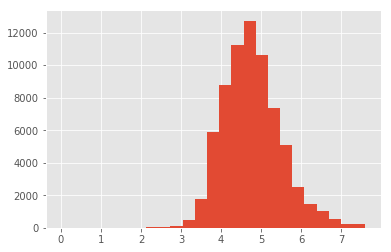

In [271]:
clean_data.log_price.hist(bins=25)

Price appears to be very equally distrubted, with a mean of 4.78. Additionally, the standard deviation is not very large, meaning there is not a ton of variance in the target varaible.

### property_type

In [272]:
clean_data.property_type.unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Hostel', 'Townhouse',
       'Guest suite', 'Bed & Breakfast', 'Bungalow', 'Guesthouse', 'Dorm',
       'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare',
       'In-law', 'Serviced apartment', 'Boat', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House', 'Train',
       'Cave', 'Lighthouse', 'Island'], dtype=object)

In [273]:
result = clean_data[['property_type']].apply(pd.value_counts).fillna(0).T
result.index=['property_type']
result.columns=['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel', 'Guest suite', 'Bed & Breakfast',
                'Bungalow', 'Guesthouse', 'Dorm', 'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare', 
                'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin', 'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
                'Casa particular', 'Chalet', 'Yurt', 'Earth House', 'Train', 'Cave', 'Lighthouse', 'Island']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Apartment,House,Condominium,Loft,Townhouse,Hostel,Guest suite,Bed & Breakfast,Bungalow,Guesthouse,...,Tent,Hut,Casa particular,Chalet,Yurt,Earth House,Train,Cave,Lighthouse,Island
property_type,46233,15858,2315,1629,1210,559,494,441,365,172,...,8,7,6,4,3,2,2,1,1,1


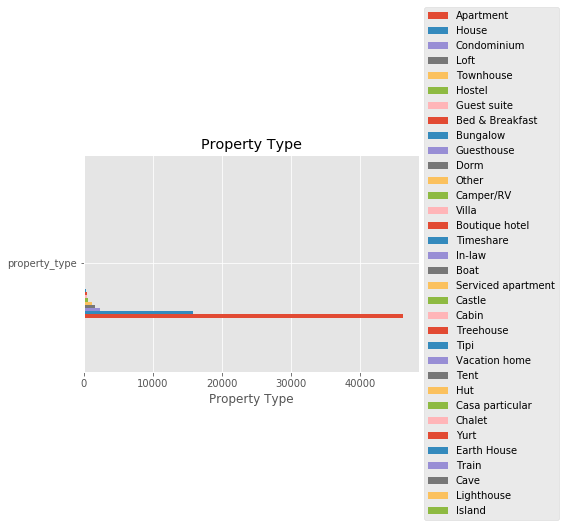

In [274]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Property Type")
plt.set_xlabel("Property Type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

From this data, it can be seen that the type of property is unequally weighted towards apartments and houses. There are plenty of other property types, but properties other than houses and apartments make up very little of the data.

### room_type

In [275]:
clean_data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [276]:
result = clean_data[['room_type']].apply(pd.value_counts).fillna(0).T
result.index=['room_type']
result.columns=['Entire home/apt', 'Private room', 'Shared room']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Entire home/apt,Private room,Shared room
room_type,38942,29085,2094


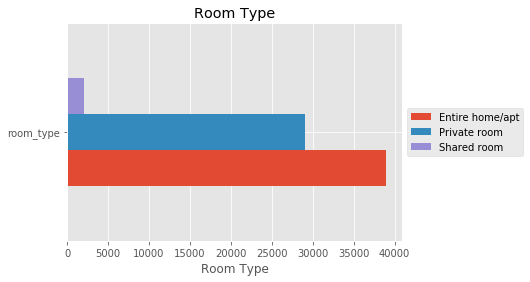

In [277]:
# horizontal bar plot
plt=result.plot.barh(title="Room Type")
plt.set_xlabel("Room Type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

Similar to property type, it can be observed that there are two main room types, which are unequally weighted more than the remaining options. In this case, almost all rooms are either the entire home/apt or a private room. Very rarely is an airbnb a shared room.

### accommodates

In [278]:
clean_data.accommodates.describe()

count   70,121
mean         3
std          2
min          1
25%          2
50%          2
75%          4
max         16
Name: accommodates, dtype: float64

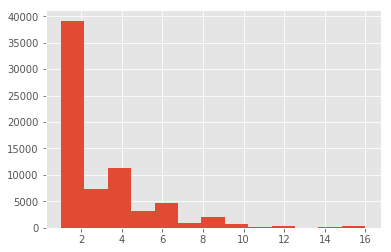

In [279]:
clean_data.accommodates.hist(bins=13)

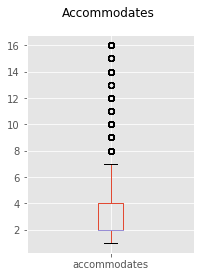

In [280]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3, 4)
fig.suptitle('Accommodates', fontsize=12)
clean_data.boxplot(column=['accommodates'])

The two plots above illustrate that for various airbnbs, the number of people that can be accomodated is not uniform, and is heavily distrubted near 1-2 people. As the boxplot shows however, there are several outliers where up to 16 are accommodated in a single airbnb.

### bathrooms

In [281]:
clean_data.bathrooms.describe()

count   70,121
mean         1
std          1
min          0
25%          1
50%          1
75%          1
max          8
Name: bathrooms, dtype: float64

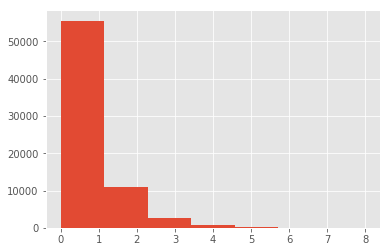

In [282]:
clean_data.bathrooms.hist(bins=7)

As the plot reveals, an overwhelming majority of airbnbs have a single bathroom, with a couple having two bathrooms. It looks to be pretty rare for a airbnb to have more than 2 airbnbs.

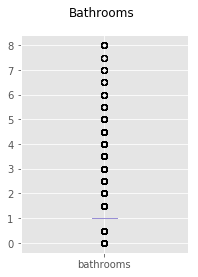

In [283]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3, 4)
fig.suptitle('Bathrooms', fontsize=12)
clean_data.boxplot(column=['bathrooms'])

The boxplot does not provide much valuable information other than the fact that any number of bathrooms outside of 1 is an outlier, which may be interesting to know for data analysis and results discussion.

### bed_type

In [284]:
clean_data.bed_type.unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed'],
      dtype=object)

In [285]:
result = clean_data[['bed_type']].apply(pd.value_counts).fillna(0).T
result.index=['bed_type']
result.columns=['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Real Bed,Futon,Pull-out Sofa,Couch,Airbed
bed_type,68140,716,561,443,261


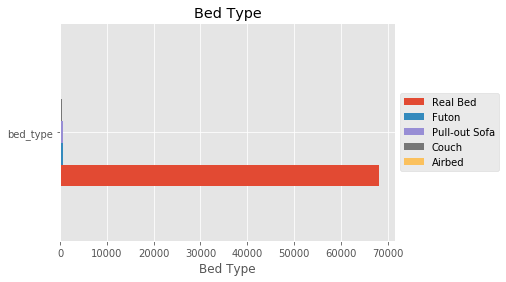

In [286]:
plt=result.plot.barh(title="Bed Type")
plt.set_xlabel("Bed Type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

Similar to many of the other categorical data, there appears to be an uneven distribution of data. Almost all airbnb rooms have a real bed for sleeping, with all the other categories only making up a very small amount of samples relative to the entire data set.

### cancellation_policy

In [287]:
clean_data.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', 'super_strict_60',
       'super_strict_30'], dtype=object)

In [288]:
result = clean_data[['cancellation_policy']].apply(pd.value_counts).fillna(0).T
result.index=['cancellation_policy']
result.columns=['strict', 'moderate', 'flexible', 'super_strict_60', 'super_strict_30']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,strict,moderate,flexible,super_strict_60,super_strict_30
cancellation_policy,30367,21529,18134,76,15


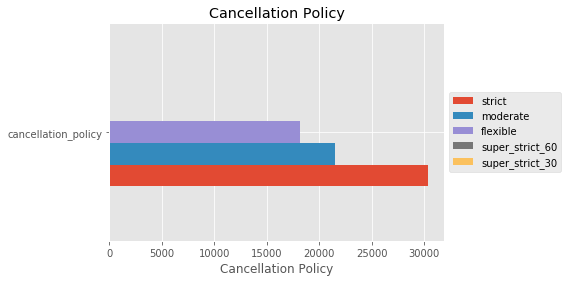

In [289]:
plt=result.plot.barh(title="Cancellation Policy")
plt.set_xlabel("Cancellation Policy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

The visualized data makes it really clear that cancellation policy is made mostly of strict, moderate, and flexible cancellation policies. The super strict 30 and 60 appear to be very unique, and rarely occuring instances. Of the three most common, the data appears to be weighted slightly towards strict, but the distrubtion is much more even than the previous features.

### cleaning_fee

In [290]:
clean_data.cleaning_fee.unique()

array([ True, False])

In [291]:
result = clean_data[['cleaning_fee']].apply(pd.value_counts).fillna(0).T
result.index=['cleaning_fee']
result.columns=['True', 'False']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,True,False
cleaning_fee,51425,18696


Since this feature is binary, it's not very helpful to plot it a bar chart of it, but it appears that most airbnbs charge a cleaning fee. In fact, more than twice the airbnbs charge a cleaning fee than don't.

It might be interesting however, to see what this data looks like plotted against price.

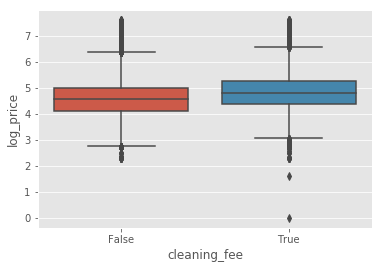

In [292]:
import seaborn as sns

ax = sns.boxplot(x="cleaning_fee", y="log_price", data=clean_data)

From the boxplot, it can be observed that having a cleaning_fee appears to have a very minor impact on the log_price of an airbnb. The mean, first quartile, and third quartile all appear to be slightly higher, with similar boundries for outliers.

### host_has_profile_pic

In [293]:
clean_data.host_has_profile_pic.unique()

array([ True, False])

In [294]:
result = clean_data[['host_has_profile_pic']].apply(pd.value_counts).fillna(0).T
result.index=['host_has_profile_pic']
result.columns=['True', 'False']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,True,False
host_has_profile_pic,69907,214


As clearly illustrated in this table, an overwhelming majority of all hosts have a profile picture set. So many more hosts have profile pictures than those that don't that it may make sense to not use this data feature in a data model. This may be explored in the data modeling.

### host_identity_verified

In [295]:
clean_data.host_identity_verified.unique()

array([ True, False])

In [296]:
result = clean_data[['host_identity_verified']].apply(pd.value_counts).fillna(0).T
result.index=['host_identity_verified']
result.columns=['True', 'False']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,True,False
host_identity_verified,47439,22682


Host identity verified is a binary feature, and interestingly, it appears to have a distribution much more equal than host identity verified. It should be noted however that more than twice the number of hosts have been verified than those who have not however.

### host_response_rate

In [297]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.host_response_rate.describe()

count   52,683.000
mean         0.942
std          0.165
min          0.000
25%          1.000
50%          1.000
75%          1.000
max          1.000
Name: host_response_rate, dtype: float64

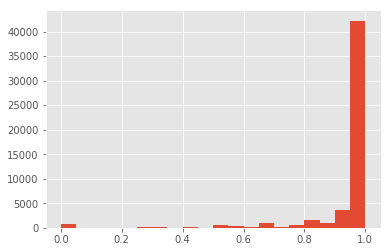

In [298]:
clean_data.host_response_rate.hist(bins=20)

It appears the response rate of airbnb hosts is heavily skewed, with most of the hosts responding 100% of the time.In fact, the mean value of host response rate is 94.4%, with a  standard deviation of 16.3%. Since the data is so skewed, it may be discovered during modeling that this feature may not provide much value for data analysis.

### instant_bookable

In [299]:
clean_data.instant_bookable.unique()

array([False,  True])

In [300]:
result = clean_data[['instant_bookable']].apply(pd.value_counts).fillna(0).T
result.index=['instant_bookable']
result.columns=['True', 'False']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,True,False
instant_bookable,51935,18186


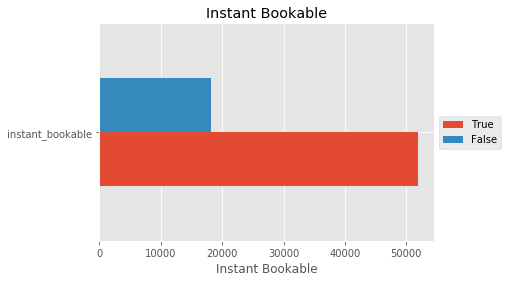

In [301]:
plt=result.plot.barh(title="Instant Bookable")
plt.set_xlabel("Instant Bookable")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

Instant bookable is another binary data type, and it appears that about 3 times as many airbnbs are instantly bookable than those that are not.

### review_scores_rating

In [302]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.review_scores_rating.describe()

count   54,187.000
mean        94.102
std          7.818
min         20.000
25%         92.000
50%         96.000
75%        100.000
max        100.000
Name: review_scores_rating, dtype: float64

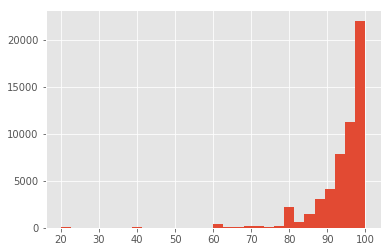

In [303]:
clean_data.review_scores_rating.hist(bins=30)

For review score rating, it appears the the data is skewed in a way that the concentration of review scores are between 90 and 100, with the most at 100. Very few scores are below 90. Such skewed data brings up the possibility that people are just bad at reviewing their stay. In reality, reviews for airbnb should be normally distributed.

### thumbnail_url

In [304]:
clean_data.thumbnail_url.unique()

array([ True, False])

In [305]:
result = clean_data[['thumbnail_url']].apply(pd.value_counts).fillna(0).T
result.index=['thumbnail_url']
result.columns=['True', 'False']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,True,False
thumbnail_url,62117,8004


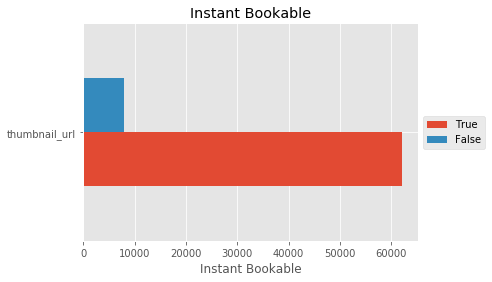

In [306]:
plt=result.plot.barh(title="Instant Bookable")
plt.set_xlabel("Instant Bookable")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

As demonstrated in the preceding table and plot, most hosts have a thumbnail url for their airbnb listing. Only about 10% of all airbnb hosts don't post a thumbnail url for their airbnb. While the data is very skewed, it may still provide valuable insight into the characteristics of particular hosts.

### zipcode

In [307]:
zipcodes = clean_data.zipcode.unique()

In [308]:
result = clean_data[['zipcode']].apply(pd.value_counts).fillna(0).T
result.index=['zipcode']
result.columns=zipcodes
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,11201,10019,10027,94117,20009,94131,90292,90015,94121,91748,...,11509,11001,10115,60603,02127,94401,10162,10309,11239,02135
zipcode,1635,1277,1202,1019,989,985,960,960,929,921,...,1,1,1,1,1,1,1,1,1,1


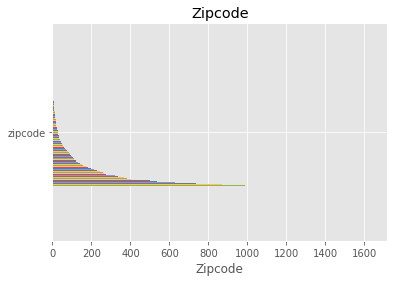

In [309]:
plt=result.plot.barh(title="Zipcode", legend=False)
plt.set_xlabel("Zipcode")
plt

 ### bedrooms

In [310]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.bedrooms.describe()

count   70,121.000
mean         1.263
std          0.852
min          0.000
25%          1.000
50%          1.000
75%          1.000
max         10.000
Name: bedrooms, dtype: float64

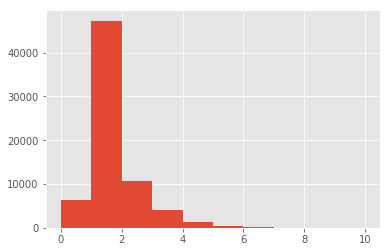

In [311]:
clean_data.bedrooms.hist(bins=10)

### beds

In [312]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.beds.describe()

count   70,121.000
mean         1.710
std          1.254
min          0.000
25%          1.000
50%          1.000
75%          2.000
max         18.000
Name: beds, dtype: float64

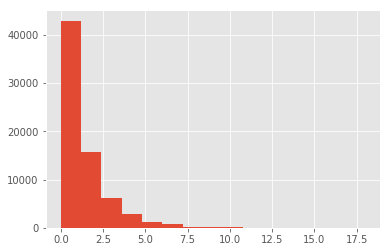

In [313]:
clean_data.beds.hist(bins=15)

### amenities_count

In [314]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.amenities_count.describe()

count   70,121.000
mean        17.515
std          6.848
min          1.000
25%         13.000
50%         17.000
75%         21.000
max         86.000
Name: amenities_count, dtype: float64

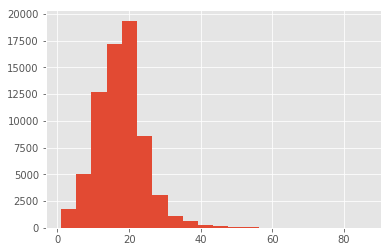

In [315]:
clean_data.amenities_count.hist(bins=20)

### description_length

In [316]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.description_length.describe()

count   70,121.000
mean       761.106
std        317.288
min          1.000
25%        480.000
50%      1,000.000
75%      1,000.000
max      1,000.000
Name: description_length, dtype: float64

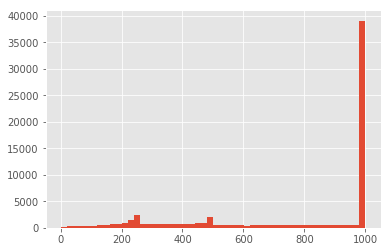

In [317]:
clean_data.description_length.hist(bins=50)

### days_hosted

In [318]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.days_hosted.describe()

count   70,121.000
mean     1,576.231
std        659.975
min        406.000
25%      1,057.000
50%      1,510.000
75%      2,035.000
max      3,905.000
Name: days_hosted, dtype: float64

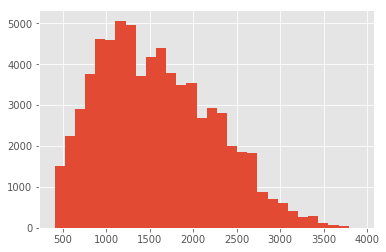

In [319]:
clean_data.days_hosted.hist(bins=30)

In [320]:
clean_data.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,host_response_rate,instant_bookable,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,description_length,days_hosted
0,5.011,Apartment,Entire home/apt,3,1.000,Real Bed,strict,True,NYC,True,...,nan,False,100.000,True,11201,1,1,9,211,2421
1,5.130,Apartment,Entire home/apt,7,1.000,Real Bed,strict,True,NYC,True,...,1.000,True,93.000,True,10019,3,3,15,1000,510
2,4.977,Apartment,Entire home/apt,5,1.000,Real Bed,moderate,True,NYC,True,...,1.000,True,92.000,True,10027,1,3,19,1000,747
3,6.620,House,Entire home/apt,4,1.000,Real Bed,flexible,True,SF,True,...,nan,False,nan,True,94117,2,2,15,468,1302
4,4.745,Apartment,Entire home/apt,2,1.000,Real Bed,moderate,True,DC,True,...,1.000,True,40.000,False,20009,0,1,12,699,1351


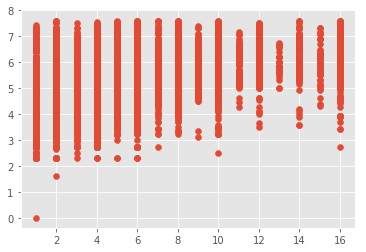

In [321]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(clean_data.accommodates, clean_data.log_price)

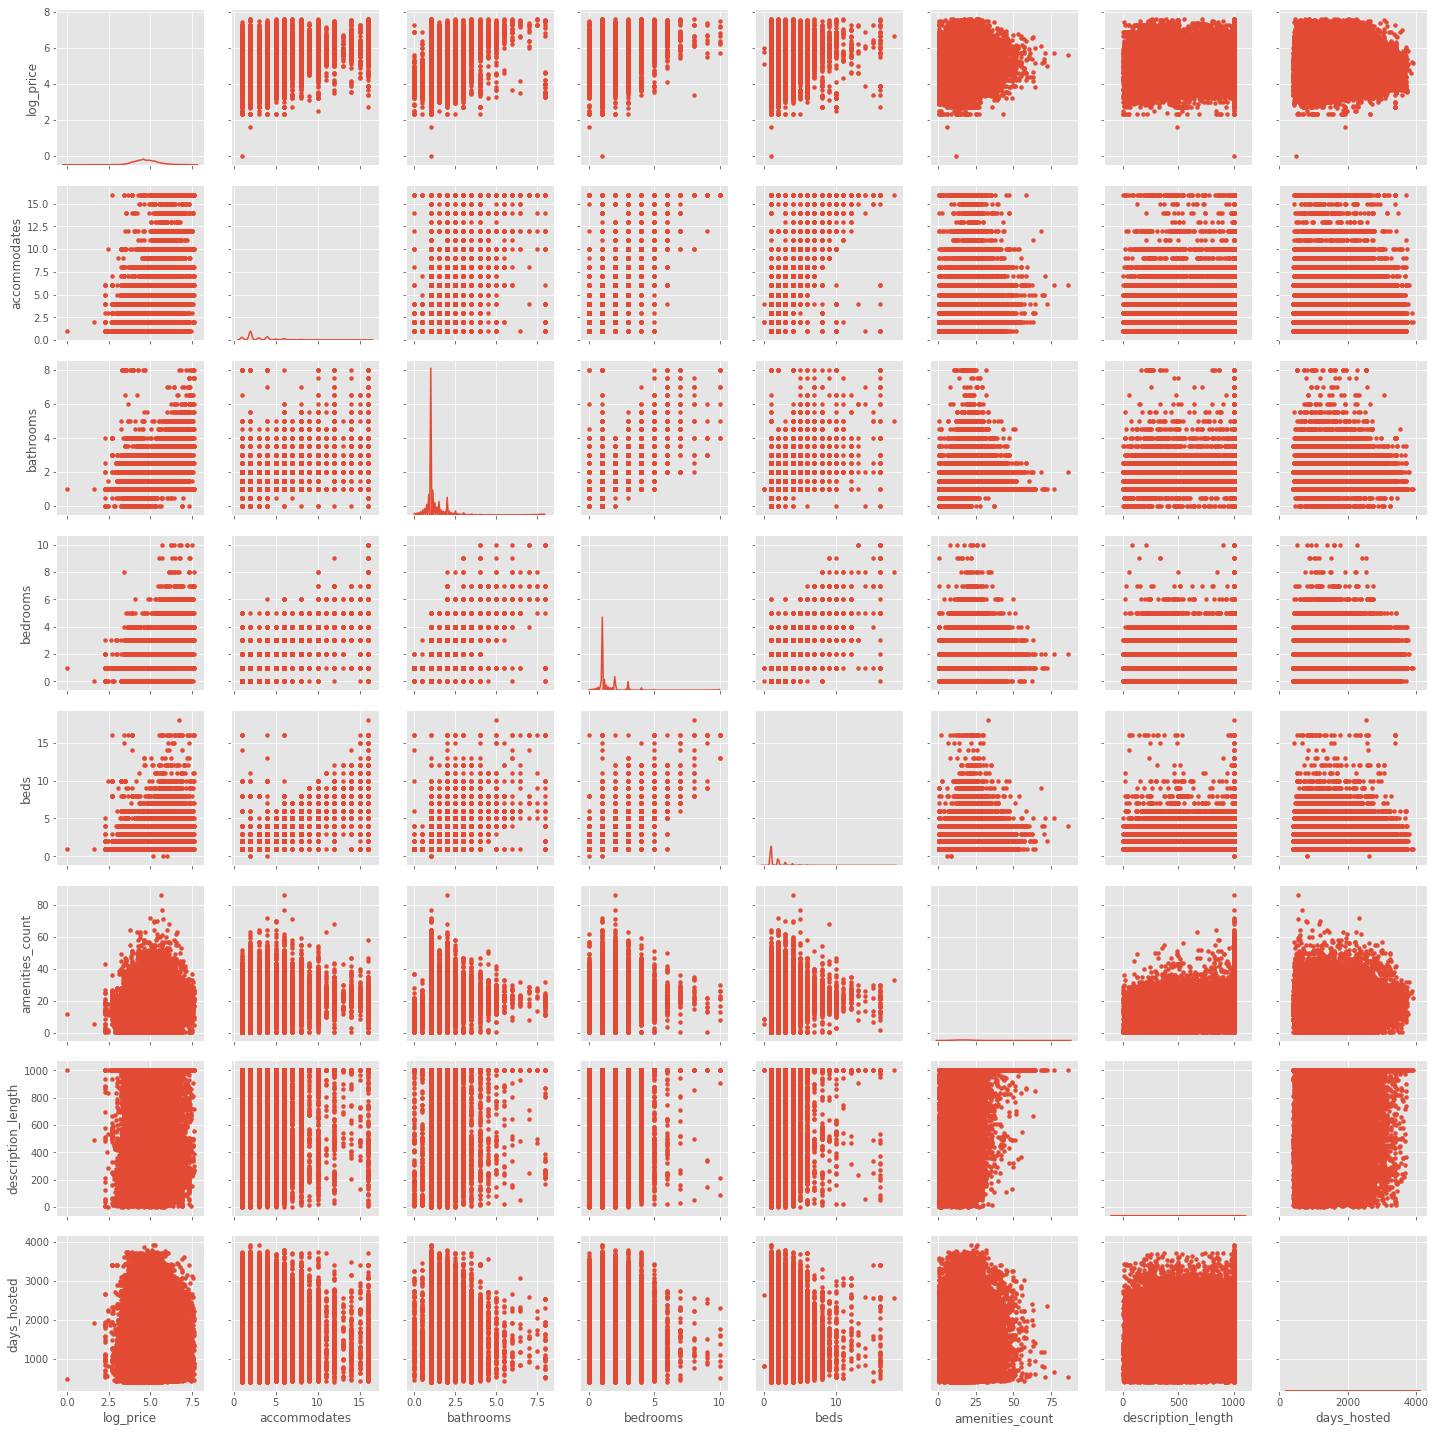

In [327]:
import seaborn.apionly as sns #sets up styles and gives us more plotting options
g = sns.PairGrid(clean_data, vars=['log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities_count',
                                   'description_length', 'days_hosted'])
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=15)

# Data Modeling and Prediction

Prior to creating several of the data models which will be needed, the data will need to be normalized, and categorical values need to be converted to numerical values using methods such as one-hot encoding. While data normalization isn't needed for all analysis techniques, it would be helpful to construct a table with a set of the normalized data.

In [328]:
clean_data.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'review_scores_rating', 'thumbnail_url', 'zipcode',
       'bedrooms', 'beds', 'amenities_count', 'description_length',
       'days_hosted'],
      dtype='object')

## Normalization of Continuous Data

In [176]:
#Handle man-max encoding for numerical data
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

# Scaling down both train and test data set - returns ndarray
cont_data_scaled = clean_data[['accommodates', 'bathrooms','host_response_rate', 'review_scores_rating', 
                              'bedrooms', 'beds', 'amenities_count', 'description_length', 'days_hosted']].copy()

cont_data_scaled[['accommodates', 'bathrooms','host_response_rate', 'review_scores_rating', 'bedrooms', 'beds',
                  'amenities_count', 'description_length', 'days_hosted']] = min_max.fit_transform(cont_data_scaled[[
                  'accommodates', 'bathrooms','host_response_rate', 'review_scores_rating', 'bedrooms', 'beds',
                  'amenities_count', 'description_length', 'days_hosted']].astype('float64'))

pd.options.display.float_format = '{:,.3f}'.format
cont_data_scaled.head()

,accommodates,bathrooms,host_response_rate,review_scores_rating,bedrooms,beds,amenities_count,description_length,days_hosted
0,0.133,0.125,nan,1.000,0.100,0.056,0.094,0.210,0.576
1,0.400,0.125,1.000,0.913,0.300,0.167,0.165,1.000,0.030
2,0.267,0.125,1.000,0.900,0.100,0.167,0.212,1.000,0.097
3,0.200,0.125,nan,nan,0.200,0.111,0.165,0.467,0.256
4,0.067,0.125,1.000,0.250,0.000,0.056,0.129,0.699,0.270


## Encoding Categorical Data

In [372]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cat_data_encoded = pd.DataFrame(index=clean_data.index)

for column in clean_data.columns:
    if clean_data[column].dtype == type(object):
        le = LabelEncoder()
        cat_data_encoded[column] = le.fit_transform(clean_data[column])

In [330]:
cat_data_encoded.head()

,property_type,room_type,bed_type,cancellation_policy,city,zipcode
0,0,0,4,2,4,121
1,0,0,4,2,4,34
2,0,0,4,1,4,41
3,17,0,4,0,5,625
4,0,0,4,1,2,221


In [331]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
cat_data_encoded_copy=cat_data_encoded.copy()

columns=cat_data_encoded.columns

for col in columns:
    
       # creating an exhaustive list of all possible categorical values
        data=cat_data_encoded_copy[[col]].append(cat_data_encoded_copy[[col]])
        enc.fit(data)
       
       # Fitting One Hot Encoding on train data
        temp = enc.transform(cat_data_encoded_copy[[col]])
    
       # Changing the encoded features into a data frame with new column names
        temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
    
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
        temp=temp.set_index(cat_data_encoded_copy.index.values)
        
       # adding the new One Hot Encoded varibales to the train data frame
        cat_data_encoded_copy=pd.concat([cat_data_encoded_copy,temp],axis=1)
        
       # fitting One Hot Encoding on test data
        temp = enc.transform(cat_data_encoded_copy[[col]])
        
       # changing it into data frame and adding column names
        temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
        
       # Setting the index for proper concatenation
        temp=temp.set_index(cat_data_encoded_copy.index.values)
        
       # adding the new One Hot Encoded varibales to test data frame
        encoded_cat_data=pd.concat([cat_data_encoded_copy,temp],axis=1)

C:\Users\larsonma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\larsonma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

In [180]:
encoded_cat_data.head()

,property_type,room_type,bed_type,cancellation_policy,zipcode,property_type_0,property_type_17,property_type_11,property_type_28,property_type_22,...,zipcode_374,zipcode_157,zipcode_7,zipcode_111,zipcode_600,zipcode_599,zipcode_6,zipcode_645,zipcode_416,zipcode_248
0,0,0,4,2,121,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0,0,4,2,34,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0,0,4,1,41,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,17,0,4,0,625,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0,0,4,1,221,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Due to the large amount of zip codes, there are 1344 columns of data needed to encode all the categorical data. This may lead to problems for data modeling, and will be handled accordinly if necessary.

## Combining the Tables

After encoding categorical features, and normalizing the numeric data, they should be combined into a single, normalized dataset for use in modeling techniques such as clustering.

In [375]:
bool_data = clean_data.select_dtypes(include='bool')
normalized_data = pd.concat([cont_data_scaled, bool_data, encoded_cat_data], axis=1)
normalized_data.head()

,accommodates,bathrooms,host_response_rate,review_scores_rating,bedrooms,beds,amenities_count,description_length,days_hosted,cleaning_fee,...,zipcode_374,zipcode_157,zipcode_7,zipcode_111,zipcode_600,zipcode_599,zipcode_6,zipcode_645,zipcode_416,zipcode_248
0,0.133,0.125,nan,1.000,0.100,0.056,0.094,0.210,0.576,True,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.400,0.125,1.000,0.913,0.300,0.167,0.165,1.000,0.030,True,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.267,0.125,1.000,0.900,0.100,0.167,0.212,1.000,0.097,True,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.200,0.125,nan,nan,0.200,0.111,0.165,0.467,0.256,True,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.067,0.125,1.000,0.250,0.000,0.056,0.129,0.699,0.270,True,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [376]:
normalized_data.describe()

,accommodates,bathrooms,host_response_rate,review_scores_rating,bedrooms,beds,amenities_count,description_length,days_hosted,property_type,...,zipcode_374,zipcode_157,zipcode_7,zipcode_111,zipcode_600,zipcode_599,zipcode_6,zipcode_645,zipcode_416,zipcode_248
count,"70,121.000","70,121.000","52,683.000","54,187.000","70,121.000","70,121.000","70,121.000","70,121.000","70,121.000","70,121.000",...,"70,121.000","70,121.000","70,121.000","70,121.000","70,121.000","70,121.000","70,121.000","70,121.000","70,121.000","70,121.000"
mean,0.144,0.154,0.942,0.926,0.126,0.095,0.194,0.761,0.334,5.789,...,0.003,0.001,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000
std,0.144,0.073,0.165,0.098,0.085,0.070,0.081,0.318,0.189,8.580,...,0.057,0.032,0.008,0.024,0.008,0.004,0.004,0.004,0.004,0.004
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.067,0.125,1.000,0.900,0.100,0.056,0.141,0.479,0.186,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.067,0.125,1.000,0.950,0.100,0.056,0.188,1.000,0.316,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.200,0.125,1.000,1.000,0.100,0.111,0.235,1.000,0.466,17.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,33.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## Clustering

Text(0.5,1,'Elbow plot')

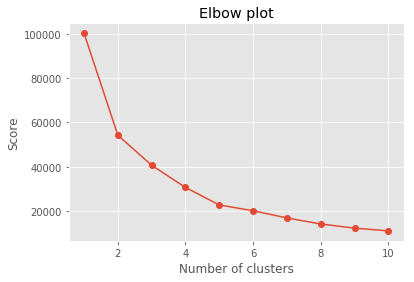

In [459]:
def get_kmeans_score(data, K):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        K - the number of centroids you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    
    # your work here
    from sklearn.cluster import KMeans
    import numpy as np
    
    kmeans = KMeans(n_clusters=K).fit(data)
    return np.abs(kmeans.score(data))

scores = []
property_type = [col for col in normalized_data.columns if 'property_type_' in col]
features = ['beds', 'city'] + property_type

X = normalized_data[features].copy()
for i in range (1,11):
    scores.append(get_kmeans_score(X, i))

import matplotlib
import matplotlib.pyplot as plt

X = list(range(1,11))
plt.plot(X, scores, '-o')
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.title("Elbow plot")

The Elbow plot above revealed an interesting trend in the data. It appeared that most of the data could be clustered into two main groups. Likely, this meant that most of the properties could fall into one of two types, with similar bathrooms and accommodation counts.

   beds  city  property_type_0  property_type_17  property_type_11  \
0 0.056     4            1.000             0.000             0.000   
1 0.167     4            1.000             0.000             0.000   
2 0.167     4            1.000             0.000             0.000   
3 0.111     5            0.000             0.000             0.000   
4 0.056     2            1.000             0.000             0.000   

   property_type_28  property_type_22  property_type_23  property_type_15  \
0             0.000             0.000             0.000             0.000   
1             0.000             0.000             0.000             0.000   
2             0.000             0.000             0.000             0.000   
3             0.000             0.000             0.000             0.000   
4             0.000             0.000             0.000             0.000   

   property_type_1       ...         property_type_18  property_type_30  \
0            0.000       ...             

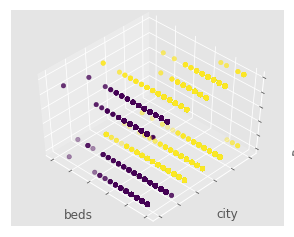

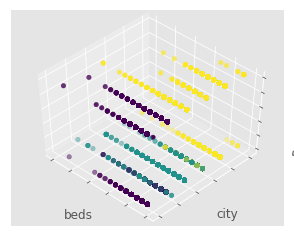

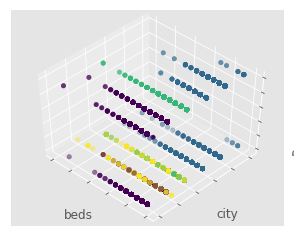

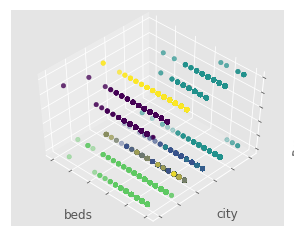

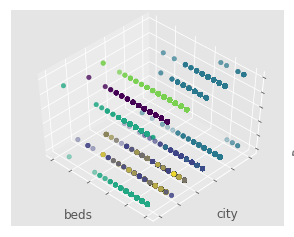

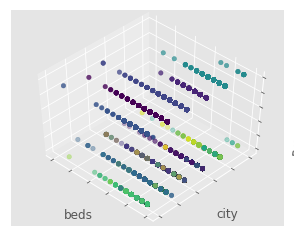

In [458]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.float_format = '{:,.3f}'.format


from sklearn.cluster import KMeans

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

property_type = [col for col in normalized_data.columns if 'property_type_' in col]
features = ['beds', 'city'] + property_type

X = normalized_data[features].copy()
y = clean_data.loc[:,"log_price"].copy()

print(X.head())
print(y.head())

estimators = {'k_means_2': KMeans(n_clusters=2),
              'k_means_3': KMeans(n_clusters=3),
              'k_means_4': KMeans(n_clusters=4),
              'k_means_5': KMeans(n_clusters=5),
              'k_means_6': KMeans(n_clusters=6),
              'k_means_20': KMeans(n_clusters=20)}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('beds')
    ax.set_ylabel('city')
    ax.set_zlabel('Property Type')
    fignum = fignum + 1

## Create Training and Validation Sets

In [377]:
# from sklearn.model_selection import train_test_split
X = normalized_data
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = sklearn.model_selection.train_test_split(X,clean_data.log_price, test_size=0.4, random_state=0)
print (X_train_norm.shape, X_test_norm.shape, Y_train_norm.shape, Y_test_norm.shape)

X = encoded_data
X_train_enc, X_test_enc, Y_train_enc, Y_test_enc = sklearn.model_selection.train_test_split(normalized_data,clean_data.log_price, test_size=0.4, random_state=0)

(42072, 1365) (28049, 1365) (42072,) (28049,)


In [378]:
Y_train_norm = Y_train_norm.values.reshape(Y_train_norm.shape[0],1)
Y_test_norm = Y_test_norm.values.reshape(Y_test_norm.shape[0],1)

## Multivariate Linear Regression

To begin analysis, multivariate linear regression will be used on the `clean_data` dataset to help identify attributes which correlate the most strongly with the target variable: `clean_data.log_price`. After obtaining the correlation of the raw data, adjustments can be made, less influential variables can be dropped, and promising relationships can be further explored.

In [462]:
# Import Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

# Create a LinearRegression Object
lreg = LinearRegression()

Since linear regression cannot be performed with NaN values, the columns `host_response_rate` and `review_scores_rating` will be dropped temporarily due to their high number of null values.

In [463]:
encoded_data = pd.concat([cont_data_scaled, cat_data_encoded], axis=1)
print(encoded_data.head())
# Data Columns
X_multi = X_train_enc.drop(['host_response_rate', 'review_scores_rating'], axis=1)

# Targets
Y_target = Y_train_enc

   accommodates  bathrooms  host_response_rate  review_scores_rating  \
0         0.133      0.125                 nan                 1.000   
1         0.400      0.125               1.000                 0.913   
2         0.267      0.125               1.000                 0.900   
3         0.200      0.125                 nan                   nan   
4         0.067      0.125               1.000                 0.250   

   bedrooms  beds  amenities_count  description_length  days_hosted  \
0     0.100 0.056            0.094               0.210        0.576   
1     0.300 0.167            0.165               1.000        0.030   
2     0.100 0.167            0.212               1.000        0.097   
3     0.200 0.111            0.165               0.467        0.256   
4     0.000 0.056            0.129               0.699        0.270   

   property_type  room_type  bed_type  cancellation_policy  city  zipcode  
0              0          0         4                    2     4

In [464]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The amount that each variable correlates to the target variable can then be viewed in order to decide which variables may be the most important to predicting the `log_price` of an airbnb.

In [465]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The estimated intercept coefficient is 827209325.95 
 The number of coefficients used was 1363 


In [466]:
coeff_df = pd.DataFrame(X_multi.columns)
coeff_df.columns = ['Features']

coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

print ('Table 1. Multivariate coefficients')
coeff_df

Table 1. Multivariate coefficients


,Features,Coefficient Estimate
0,accommodates,1.186
1,bathrooms,0.914
2,bedrooms,1.678
3,beds,-0.627
4,amenities_count,0.398
5,description_length,-0.085
6,days_hosted,0.090
7,cleaning_fee,-0.058
8,host_has_profile_pic,-0.080
9,host_identity_verified,-0.041


In [467]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train_enc.drop(['host_response_rate', 'review_scores_rating'], axis=1))
pred_test = lreg.predict(X_test_enc.drop(['host_response_rate', 'review_scores_rating'], axis=1))

print ("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train_enc - pred_train) ** 2) )
print ("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  % np.mean((Y_test_enc - pred_test) ** 2) )
print ("R2 Score: %.2f" % lreg.score(X_multi, Y_target))

Fit a model X_train, and calculate MSE with Y_train: 0.17
Fit a model X_train, and calculate MSE with X_test and Y_test: 1887671057372.55
R2 Score: 0.67


The results of the initial linear regression indicate that the dataset is very noisy, and likely has several features that do not help contribute to the accuracy of the data model. Rather, featues with the highest impact on the target variable should be selected, and the model should be retested to verify if any performance improvements could be made.

In [468]:
X_train_enc_modified = X_train_enc[['accommodates', 'amenities_count', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4', 'city_5']]
X_test_enc_modified = X_test_enc[['accommodates', 'amenities_count', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4', 'city_5']]
X_train_enc_modified.head()

,accommodates,amenities_count,city_0,city_1,city_2,city_3,city_4,city_5
39468,0.067,0.247,0.000,0.000,1.000,0.000,0.000,0.000
15067,0.000,0.141,0.000,1.000,0.000,0.000,0.000,0.000
3608,0.333,0.118,1.000,0.000,0.000,0.000,0.000,0.000
65770,0.067,0.035,0.000,1.000,0.000,0.000,0.000,0.000
60878,0.067,0.212,0.000,1.000,0.000,0.000,0.000,0.000


In [470]:
lreg2 = LinearRegression()

In [472]:
lreg2.fit(X_train_enc_modified,Y_target)

coeff_df = pd.DataFrame(X_train_enc_modified.columns)
coeff_df.columns = ['Features']

coeff_df["Coefficient Estimate"] = pd.Series(lreg2.coef_)

print ('Table 1. Multivariate coefficients')
print(coeff_df)

# Predictions on training and testing sets
pred_train = lreg2.predict(X_train_enc_modified)
pred_test = lreg2.predict(Y_test_enc_modified)

print ("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train_enc - pred_train) ** 2) )
print ("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  % np.mean((Y_test_enc - pred_test) ** 2) )
print ("R2 Score: %.2f" % lreg2.score(X_train_enc_modified, Y_target))

Table 1. Multivariate coefficients
          Features  Coefficient Estimate
0     accommodates                 2.813
1  amenities_count                 0.450
2           city_0   817,106,722,123.607
3           city_1   817,106,722,123.240
4           city_2   817,106,722,123.121
5           city_3   817,106,722,122.932
6           city_4   817,106,722,123.197
7           city_5   817,106,722,123.359
Fit a model X_train, and calculate MSE with Y_train: 0.33
Fit a model X_train, and calculate MSE with X_test and Y_test: 0.32
R2 Score: 0.37


By Limiting the features used for prediction, the coefficient of the model was nearly halfed. Next, additional features should be experimented with to find the optimal feature selection for determining price.

*Note*: While the previous coefficeint table indicated that factors such as beds and bedrooms had a significant impact on the price of the airbnb, including them with the accommodates feature may introduce error since the features are significantly related. A combination of accomodates, beds, and bedrooms should be avoided.

In [473]:
clean_data.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'review_scores_rating', 'thumbnail_url', 'zipcode',
       'bedrooms', 'beds', 'amenities_count', 'description_length',
       'days_hosted'],
      dtype='object')

In [516]:
property_type = [col for col in X_train_enc.columns if 'property_type_' in col]
zipcode_type = [col for col in X_train_enc.columns if 'zipcode_' in col]
city_type = [col for col in X_train_enc.columns if 'city_' in col]
bed_type = [col for col in X_train_enc.columns if 'bed_type_' in col]
cancellation_type = [col for col in X_train_enc.columns if 'cancellation_policy_' in col]

features = ['bathrooms', 'accommodates'] + property_type + room_type + city_type
X_train_enc_modified = X_train_enc[features]
X_test_enc_modified = X_test_enc[features]

In [517]:
lreg3 = LinearRegression()

lreg3.fit(X_train_enc_modified,Y_target)

coeff_df = pd.DataFrame(X_train_enc_modified.columns)
coeff_df.columns = ['Features']

coeff_df["Coefficient Estimate"] = pd.Series(lreg3.coef_)

print ('Table 1. Multivariate coefficients')
print(coeff_df)

# Predictions on training and testing sets
pred_train = lreg3.predict(X_train_enc_modified)
pred_test = lreg3.predict(X_test_enc_modified)

print ("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train_enc - pred_train) ** 2) )
print ("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  % np.mean((Y_test_enc - pred_test) ** 2) )
print ("R2 Score: %.2f" % lreg3.score(X_train_enc_modified, Y_target))

Table 1. Multivariate coefficients
            Features  Coefficient Estimate
0          bathrooms                 1.745
1       accommodates                 1.358
2    property_type_0   478,368,332,379.926
3   property_type_17   478,368,332,380.095
4   property_type_11   478,368,332,380.112
5   property_type_28   478,368,332,380.306
6   property_type_22   478,368,332,379.861
7   property_type_23   478,368,332,379.803
8   property_type_15   478,368,332,379.758
9    property_type_1   478,368,332,380.318
10   property_type_4   478,368,332,380.013
11  property_type_32   478,368,332,380.211
12  property_type_12   478,368,332,380.172
13  property_type_14   478,368,332,380.063
14   property_type_6   478,368,332,379.338
15  property_type_26   478,368,332,380.983
16   property_type_5   478,368,332,379.770
17   property_type_3   478,368,332,379.792
18  property_type_19   478,368,332,379.161
19  property_type_16   478,368,332,379.923
20   property_type_2   478,368,332,379.270
21  property_type_2

After tyring a number of different coefficient combinations, it was difficult to get a R2 value that was as high as it was when using all of the features. Using all of the features, however, yielded and extremely high MSE with the test/validation data. This indicated that using features such as zipcode were overfitting the data - the training data would have a very low MSE, with a high correlation (R2). By stripping the model to a select few features however, the R2 score could be kept at 0.54 (not great, but not unusable), while keeping the MSE with test data low.

## A Few More Details

### Geographic Location (zipcode)

One of the minor hypotheses made was that zipcode would correlate strongly with price, and it could be used to accurately predict new airbnb prices. While this was somewhat explored in the previous section, it's effects will be brefiely investigated.

In [518]:
zipcode_type = [col for col in X_train_enc.columns if 'zipcode_' in col]

X_train_enc_modified = X_train_enc[zipcode_type]
X_test_enc_modified = X_test_enc[zipcode_type]

In [521]:
lregZip = LinearRegression()

lregZip.fit(X_train_enc_modified,Y_target)

coeff_df = pd.DataFrame(X_train_enc_modified.columns)
coeff_df.columns = ['Features']

coeff_df["Coefficient Estimate"] = pd.Series(lregZip.coef_)

print ('Table 1. Multivariate coefficients')
print(coeff_df)

# Predictions on training and testing sets
pred_train = lregZip.predict(X_train_enc_modified)
pred_test = lregZip.predict(X_test_enc_modified)

print ("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train_enc - pred_train) ** 2) )
print ("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  % np.mean((Y_test_enc - pred_test) ** 2) )
print ("R2 Score: %.2f" % lregZip.score(X_train_enc_modified, Y_target))

Table 1. Multivariate coefficients
         Features    Coefficient Estimate
0     zipcode_130  -6,639,536,880,628.806
1     zipcode_130   3,531,908,936,527.829
2     zipcode_408   1,831,293,782,671.200
3     zipcode_408   5,077,363,158,843.765
4     zipcode_140   9,295,359,956,043.514
5     zipcode_140  32,291,099,651,437.055
6     zipcode_125 -23,872,401,809,007.262
7     zipcode_125 -17,353,020,670,889.426
8     zipcode_619   5,336,688,533,684.575
9     zipcode_619     744,491,344,660.087
10    zipcode_354     613,872,303,577.366
11    zipcode_354 -10,320,083,763,447.172
12    zipcode_214  -5,220,981,113,726.618
13    zipcode_214 -21,973,324,796,777.434
14     zipcode_19  13,319,238,885,394.705
15     zipcode_19   9,817,776,028,284.857
16    zipcode_221  19,303,753,971,848.965
17    zipcode_221 -18,855,438,018,429.434
18    zipcode_135  -1,509,373,292,838.051
19    zipcode_135 -24,507,140,083,844.066
20     zipcode_25  -6,045,742,675,193.780
21     zipcode_25   1,689,551,073,396.756

It appears that zipcode has a significant correlation with the price of an airbnb. While a R2 score of 0.23 is not very high, it's the only feature being tested our of dozens, and it reflects that it has significant importance in the test data. One may decide to use zipcode as a feature in their model based off of this, but doing so would be a mistake. By using seperate test data, it can be clearly seen that zipcode is not actually a great predictor, and can lead to significant error for data that the model has not been trained on yet. As a result, a more appropriate feature to use for geographical data would be city.

### Amenities

Another hypothesis that was made was that the number of amenities that a host offered would strongly correlate with the price of the airbnb. To take an isolated look at this:

In [522]:
X_train_enc_modified = X_train_enc[['amenities_count']]
X_test_enc_modified = X_test_enc[['amenities_count']]

In [523]:
lregAmen = LinearRegression()

lregAmen.fit(X_train_enc_modified,Y_target)

coeff_df = pd.DataFrame(X_train_enc_modified.columns)
coeff_df.columns = ['Features']

coeff_df["Coefficient Estimate"] = pd.Series(lregZip.coef_)

print ('Table 1. Multivariate coefficients')
print(coeff_df)

# Predictions on training and testing sets
pred_train = lregAmen.predict(X_train_enc_modified)
pred_test = lregAmen.predict(X_test_enc_modified)

print ("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train_enc - pred_train) ** 2) )
print ("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  % np.mean((Y_test_enc - pred_test) ** 2) )
print ("R2 Score: %.2f" % lregAmen.score(X_train_enc_modified, Y_target))

Table 1. Multivariate coefficients
          Features   Coefficient Estimate
0  amenities_count -6,639,536,880,628.806
Fit a model X_train, and calculate MSE with Y_train: 0.50
Fit a model X_train, and calculate MSE with X_test and Y_test: 0.50
R2 Score: 0.04


Contrary to the hypothesis, the amenitiy count did not have a very significant impact on the price of the airbnb. While test data did not wildly diverge from the test data predictions (like it did for zipcode), when the feature is isolated, it has a very low correlation with the price of the airbnb.

# Results Analysis

The airbnb dataset revealed several interesting features, both expected and unexpected. Prior to performing any data analysis, a significant amount of data preperation and preprocessing was needed. Several fields were missing, many fields were poorly contructed, and several fields were not the correct data type. Additionally, many features (such as amenities) were not needed, and we transformed into more relevant features (such as amenities count).

By the end of the statistical analysis performed on this dataset, a model was constructed which had a R2 value of 0.54, and a MSE that was similar for both training data and test data. An R2 value could be achieved (a value of 0.66 was acheived), however, it led to a large amount of MSE for the test data. This indicated that the model was being overfit, and the number of features being used needed to be trimmed down, and features needed to be choosen better; some features were being used in the model while they did not provide meaningful, or accurate prediction). Zipcode was a great example of this. Earlier in the hypothesis section of this project, I made the hypothesis that zipcode would strongly correlate to the price of an airbnb. This appeared to be correct at first - including the zipcode as a feature for the model resulted in a much higher R2 value for the training data. When running the model on test data however, an extremely high MSE resulted; this indicated that the zipcode feature was not a great feature for predicting the target value.

I also found clustering for this dataset to be particularly difficult. Due to the high dimensionality of this dataset, in addition to the vast amount of categories for much of the categorical data, it was difficult to come up with a valid visual representation of the dataset which could accurately and meaningfully show groups/clusters of the data. 

In the end, it's difficult to say if the primary hypothesis was proven. The model is able to predict airbnb prices with a R2 value of 0.54. While this is not a great value, the model likely provides enough value to make it meaningful. The other hypotheses that were made did not turn out as well. As demonstrated in this notebook, my hypothesis regarding zipcode and amenitiy count were proven to be false. While the hypothesis were proven to be false, their analysis provided interesting insight into the dataset. The other hypothesis regarding host ratings could not be explored in a detailed, satisfactory manor because a large percentage of the data was missing. 

While the analysis performed was worthwhile, it could likely be imporoved using more advanced methodologies. In particular, this dataset was very high dimensional, which made it difficult to visualize relationships and explore the data further. It would probably be helpful to perform principal component analysis (PCA) prior to analyzing the data to help reduce it to lower dimensionality. Additionally, more advanced models other than linear regression could have probably classified the dataset in a more appropriate manner. 

All in all, I learned several important lessons from this project. I learned that data pre-processing can be extemely time consuming. A signficant portion of this project was spent viewing and cleaning the data just so that it could be in a state in which it could be analyzed. Additionally, I learned that creating the best model for predicting a target variable is a length process that doesn't involve a single path. It is very much iterative, and I found myself trying a signicant number of feature combinations which both improved and degraded the performance of the model (not all are documented in this notebook). I also learned that hypotheses that seem obvious are anything but. There were several predictions that I made taht I assumed would be correct, but later found to be false. Lastly, I learned the importance of using seperate testing and training data. Had I not used a seperate set of data for validation, I would have most likely included features such as zipcode which were causing the model to overfit the training data. These features seemed to help accurately predict the target variable (and logically they made sense), but in reality, it was best for them to be excluded from the dataset.